<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-библиотек:" data-toc-modified-id="Загрузка-библиотек:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка библиотек:</a></span></li><li><span><a href="#Загрузка-файлов:" data-toc-modified-id="Загрузка-файлов:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка файлов:</a></span></li><li><span><a href="#Обзор-данных:" data-toc-modified-id="Обзор-данных:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Обзор данных:</a></span></li><li><span><a href="#Подготовка-файла:" data-toc-modified-id="Подготовка-файла:-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Подготовка файла:</a></span><ul class="toc-item"><li><span><a href="#Очистка-текста:" data-toc-modified-id="Очистка-текста:-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Очистка текста:</a></span></li><li><span><a href="#Выборка-случайных-позиций-из-датасета-(вынужденная):" data-toc-modified-id="Выборка-случайных-позиций-из-датасета-(вынужденная):-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Выборка случайных позиций из датасета (вынужденная):</a></span></li><li><span><a href="#Создание-токенов:" data-toc-modified-id="Создание-токенов:-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Создание токенов:</a></span></li><li><span><a href="#Создание-тензоров:" data-toc-modified-id="Создание-тензоров:-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Создание тензоров:</a></span></li><li><span><a href="#Подготовка-признаков:" data-toc-modified-id="Подготовка-признаков:-1.4.5"><span class="toc-item-num">1.4.5&nbsp;&nbsp;</span>Подготовка признаков:</a></span></li></ul></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия:" data-toc-modified-id="Логистическая-регрессия:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Логистическая регрессия:</a></span></li><li><span><a href="#Решающее-дерево:" data-toc-modified-id="Решающее-дерево:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Решающее дерево:</a></span></li><li><span><a href="#CatBoost:" data-toc-modified-id="CatBoost:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>CatBoost:</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span><ul class="toc-item"><li><span><a href="#CatBoost:" data-toc-modified-id="CatBoost:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>CatBoost:</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп» с BERT

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

### Загрузка библиотек:

In [762]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm, notebook
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from catboost import CatBoostClassifier

#conda install pytorch torchvision torchaudio cpuonly -c pytorch
#pip install torch
#pip install TensorFlow
#pip install PyTorch
#pip install transformers
#pip install wordcloud
#pip install --upgrade Pillow

import torch
import os
import transformers
import transformers as ppb

from os import path
from wordcloud import WordCloud

### Загрузка файлов:

In [763]:
try:
    data = pd.read_csv('/datasets/toxic_comments.csv')
except:
    data = pd.read_csv('toxic_comments.csv')

### Обзор данных:

In [764]:
def data_check (data_file):
    display(data_file.head())
    data_file.info()
    print('Количество пропусков', data_file.isna().sum().sum())
    print('Количество дубликатов:', sum(data_file.duplicated()))
    return 

In [765]:
data_check(data)

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB
Количество пропусков 0
Количество дубликатов: 0


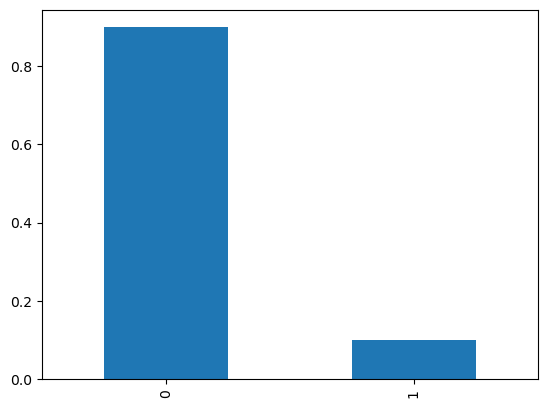

In [766]:
class_check = data['toxic'].value_counts(normalize=True)
class_check.plot(kind='bar');

**Вывод:** Пропусков, дублей и других аномалий не обнаружено. Имеется дисбаланс классов, который мы уберем функцией апселинга. Можно обрабатывать файл дальше.

In [767]:
text_raw = " ".join(data['text'])

In [768]:
wordcloud = WordCloud().generate(text_raw)

(-0.5, 399.5, 199.5, -0.5)

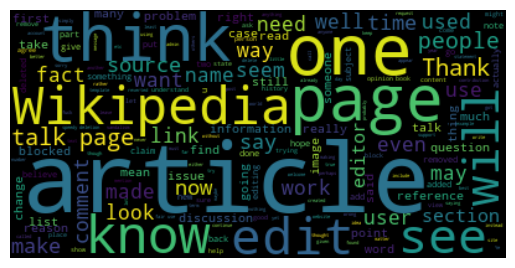

In [769]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

### Подготовка файла:

#### Очистка текста:

Используем функцию **clear_text** для очистки текста от мусора:

In [770]:
tqdm.pandas()

In [771]:
def clear_text(text):
   
    clear_text = re.sub(r'[^a-zA-Z]', ' ', text)
    clear_text = clear_text.split()
    clear_text = " ".join(clear_text)
    return clear_text 

In [772]:
data['text'] = data['text'].progress_apply(clear_text)

  0%|          | 0/159292 [00:00<?, ?it/s]

In [773]:
data_check(data)

,Unnamed: 0,text,toxic
0,0,Explanation Why the edits made under my userna...,0
1,1,D aww He matches this background colour I m se...,0
2,2,Hey man I m really not trying to edit war It s...,0
3,3,More I can t make any real suggestions on impr...,0
4,4,You sir are my hero Any chance you remember wh...,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB
Количество пропусков 0
Количество дубликатов: 0


#### Выборка случайных позиций из датасета (вынужденная):

In [774]:
data_ost, data_mod = train_test_split(data, test_size=1500, random_state=12345)

In [775]:
data_mod.shape

(1500, 3)

#### Создание токенов:

In [776]:
model_class = transformers.AutoModel.from_pretrained('unitary/toxic-bert')
tokenizer_class = transformers.AutoTokenizer.from_pretrained('unitary/toxic-bert')

Some weights of the model checkpoint at unitary/toxic-bert were not used when initializing BertModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [777]:
tokenizer = tokenizer_class
model = model_class

In [778]:
tokenized = data_mod['text'].progress_apply((lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=10, truncation=True)))

  0%|          | 0/1500 [00:00<?, ?it/s]

In [779]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

In [780]:
padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])

In [781]:
attention_mask = np.where(padded != 0, 1, 0)

In [782]:
attention_mask

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

#### Создание тензоров:

In [783]:
batch_size = 10
embeddings = []
for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
        batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]) 
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])
        
        with torch.no_grad():
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        embeddings.append(batch_embeddings[0][:,0,:].numpy())

  0%|          | 0/150 [00:00<?, ?it/s]

In [784]:
features = np.concatenate(embeddings)

In [785]:
final_features = pd.DataFrame(features)

In [786]:
final_features 

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.668083,-0.950344,0.468588,-0.563684,0.853329,0.270478,-0.107230,-0.091906,-0.262019,-0.693899,...,-0.723382,-1.293342,0.181642,-0.735418,0.066002,0.803123,-0.289756,-0.922352,0.452785,0.374308
1,-0.291251,0.099661,0.491632,-0.371130,0.122507,0.680457,0.789726,1.113528,-0.331364,0.143391,...,-0.991727,0.583062,-0.229645,-0.457128,-0.653195,-0.198898,0.070784,-0.122628,0.449506,0.422324
2,-0.637690,-0.908600,0.662553,-0.565832,0.763563,0.365080,0.135758,0.166308,-0.301692,-0.477183,...,-0.697900,-1.244644,0.660181,-0.524218,0.099470,0.752577,-0.290393,-0.768178,0.397727,0.483549
3,-0.483976,-0.869214,0.496964,-0.518637,0.767663,0.239506,0.056552,0.098435,-0.195143,-0.672172,...,-0.721647,-1.092050,0.259798,-0.659188,0.122579,0.882369,-0.228463,-0.844493,0.562495,0.221001
4,-0.537022,-0.739125,0.606627,-0.362558,0.834062,0.196040,-0.117796,0.154398,-0.303417,-0.648471,...,-0.394876,-1.238206,0.249882,-0.543939,0.082497,0.861443,-0.366874,-0.982256,0.328317,0.078692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-0.270140,-0.554274,0.989222,-0.557403,0.964020,0.274874,0.404784,0.176138,-0.158532,-0.709310,...,-0.760435,-0.985813,0.450904,-0.552280,-0.070433,0.901308,-0.228376,-0.995650,0.556483,0.348316
1496,-0.497445,-0.898392,0.485019,-0.694864,0.791767,0.146714,0.049765,0.201803,-0.333646,-0.701678,...,-0.872225,-1.002270,0.366027,-0.578653,0.230237,1.088864,-0.411329,-0.992433,0.480418,0.337540
1497,-0.687850,-0.745420,0.365188,-0.563477,0.883165,0.421073,0.124170,0.141346,-0.326558,-0.717092,...,-0.625198,-0.753296,0.486243,-0.535953,0.045429,0.557233,-0.245724,-0.774444,0.631455,0.523015
1498,-0.620821,-0.993034,0.359176,-0.427446,0.889859,0.286988,-0.008242,0.024808,-0.384385,-0.603740,...,-0.633725,-1.128404,0.342374,-0.755969,0.044136,0.865431,-0.344944,-0.846829,0.463624,0.071149


#### Подготовка признаков:

In [787]:
features = final_features
target = data_mod['toxic']

In [788]:
target = data_mod['toxic'].reset_index(drop=True)

In [789]:
features_train, features_valid, target_train, target_valid =  train_test_split(features, target, test_size=0.25, random_state=12345, stratify=target)
features_train, features_test, target_train, target_test = train_test_split(features_train, target_train, test_size=0.25, random_state=12345)

In [790]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [791]:
features_train, target_train = upsample(features_train, target_train, 10)

**Вывод:** Матрица для Берта подготовлена, признаки размечены и теперь можно обучать модели.

## Обучение

Проведем обучение и тестирование трех моделей: логической регрессии, решающего дерева и Кэтбуста:

### Логистическая регрессия:

In [792]:
best_model = None
best_f1 = 0
best_iter = 0

In [793]:
for i in tqdm(range(100, 500)):
    model_log = LogisticRegression(random_state=12345, max_iter=i)
    model_log.fit(features_train, target_train)
    predictions = model_log.predict(features_valid)
    f1_result = f1_score(target_valid, predictions)
    
    if f1_result > best_f1:
        best_f1 = f1_result
        best_iter = i
print('F1:', best_f1) 
print('Гиперпараметры модели:')
print('max_iter:', best_iter)        

  0%|          | 0/400 [00:00<?, ?it/s]

F1: 0.6352941176470588
Гиперпараметры модели:
max_iter: 110


### Решающее дерево:

In [794]:
best_model = None
best_f1 = 0
best_depth = 0

In [795]:
for max_depth in tqdm(range(2, 10)):
    for min_samples_split in range(2, 4):
        for min_samples_leaf in range(2, 3):
            model_tree = DecisionTreeClassifier(random_state=12345, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
            model_tree.fit(features_train, target_train)
            predictions = model_tree.predict(features_valid)
            f1_result = f1_score(target_valid, predictions)
            
            if f1_result > best_f1:
                best_parameter = [max_depth, min_samples_split, min_samples_leaf]
                best_f1 = f1_result
print('F1:', best_f1) 
print('Гиперпараметры модели:')
print('max_depth:', best_parameter[0]) 
print('min_samples_split:', best_parameter[1])
print('min_samples_leaf:', best_parameter[2]) 

  0%|          | 0/8 [00:00<?, ?it/s]

F1: 0.574712643678161
Гиперпараметры модели:
max_depth: 6
min_samples_split: 2
min_samples_leaf: 2


### CatBoost:

In [796]:
best_model = None
best_f1 = 0
best_iter = 0
best_rate = 0

In [797]:
for iter_ in [150, 600]:
    for rate in [0.01, 0.06, 0.3, 0.5]:
        model_cat = CatBoostClassifier(random_state=12345, iterations=iter_, learning_rate = rate) 
        model_cat.fit(features_train, target_train) 
        predictions = model_cat.predict(features_valid)
        f1_result = f1_score(target_valid, predictions)
        
        if f1_result > best_f1:
            best_f1 = f1_result
            best_parameter = [iter_, rate]
print('F1:', best_f1) 
print('Гиперпараметры модели:')
print('iterations:', best_parameter[0]) 
print('learning_rate:', best_parameter[1])         

0:	learn: 0.6803083	total: 105ms	remaining: 15.6s
1:	learn: 0.6673168	total: 158ms	remaining: 11.7s
2:	learn: 0.6561701	total: 196ms	remaining: 9.61s
3:	learn: 0.6432124	total: 236ms	remaining: 8.63s
4:	learn: 0.6331200	total: 275ms	remaining: 7.97s
5:	learn: 0.6235316	total: 315ms	remaining: 7.56s
6:	learn: 0.6139324	total: 358ms	remaining: 7.31s
7:	learn: 0.6044020	total: 399ms	remaining: 7.08s
8:	learn: 0.5946356	total: 439ms	remaining: 6.88s
9:	learn: 0.5864804	total: 479ms	remaining: 6.71s
10:	learn: 0.5770533	total: 518ms	remaining: 6.54s
11:	learn: 0.5673045	total: 559ms	remaining: 6.42s
12:	learn: 0.5589088	total: 600ms	remaining: 6.32s
13:	learn: 0.5498180	total: 640ms	remaining: 6.22s
14:	learn: 0.5393917	total: 681ms	remaining: 6.13s
15:	learn: 0.5311875	total: 720ms	remaining: 6.03s
16:	learn: 0.5239950	total: 762ms	remaining: 5.96s
17:	learn: 0.5169374	total: 808ms	remaining: 5.92s
18:	learn: 0.5081964	total: 849ms	remaining: 5.85s
19:	learn: 0.4998410	total: 890ms	remaini

11:	learn: 0.2455842	total: 484ms	remaining: 5.57s
12:	learn: 0.2281916	total: 525ms	remaining: 5.53s
13:	learn: 0.2164221	total: 565ms	remaining: 5.49s
14:	learn: 0.2046462	total: 605ms	remaining: 5.45s
15:	learn: 0.1920551	total: 645ms	remaining: 5.4s
16:	learn: 0.1798689	total: 684ms	remaining: 5.35s
17:	learn: 0.1742338	total: 724ms	remaining: 5.31s
18:	learn: 0.1669715	total: 766ms	remaining: 5.28s
19:	learn: 0.1610071	total: 805ms	remaining: 5.23s
20:	learn: 0.1535225	total: 846ms	remaining: 5.19s
21:	learn: 0.1474304	total: 885ms	remaining: 5.15s
22:	learn: 0.1403495	total: 925ms	remaining: 5.11s
23:	learn: 0.1353167	total: 966ms	remaining: 5.07s
24:	learn: 0.1294749	total: 1.01s	remaining: 5.06s
25:	learn: 0.1236818	total: 1.06s	remaining: 5.04s
26:	learn: 0.1211113	total: 1.1s	remaining: 5.02s
27:	learn: 0.1173263	total: 1.14s	remaining: 4.97s
28:	learn: 0.1128719	total: 1.18s	remaining: 4.93s
29:	learn: 0.1097708	total: 1.22s	remaining: 4.89s
30:	learn: 0.1060224	total: 1.26s

26:	learn: 0.0200415	total: 1.16s	remaining: 5.28s
27:	learn: 0.0196712	total: 1.2s	remaining: 5.23s
28:	learn: 0.0171312	total: 1.24s	remaining: 5.18s
29:	learn: 0.0162212	total: 1.28s	remaining: 5.13s
30:	learn: 0.0160888	total: 1.32s	remaining: 5.08s
31:	learn: 0.0140338	total: 1.36s	remaining: 5.02s
32:	learn: 0.0134736	total: 1.4s	remaining: 4.97s
33:	learn: 0.0121160	total: 1.44s	remaining: 4.92s
34:	learn: 0.0114971	total: 1.48s	remaining: 4.87s
35:	learn: 0.0106218	total: 1.53s	remaining: 4.84s
36:	learn: 0.0097045	total: 1.57s	remaining: 4.79s
37:	learn: 0.0091303	total: 1.61s	remaining: 4.75s
38:	learn: 0.0083196	total: 1.65s	remaining: 4.7s
39:	learn: 0.0075633	total: 1.69s	remaining: 4.66s
40:	learn: 0.0071517	total: 1.74s	remaining: 4.61s
41:	learn: 0.0070456	total: 1.78s	remaining: 4.58s
42:	learn: 0.0065118	total: 1.82s	remaining: 4.53s
43:	learn: 0.0059214	total: 1.87s	remaining: 4.5s
44:	learn: 0.0057474	total: 1.92s	remaining: 4.49s
45:	learn: 0.0056948	total: 1.96s	r

42:	learn: 0.0032323	total: 1.78s	remaining: 4.43s
43:	learn: 0.0031889	total: 1.82s	remaining: 4.39s
44:	learn: 0.0031887	total: 1.86s	remaining: 4.35s
45:	learn: 0.0031887	total: 1.9s	remaining: 4.3s
46:	learn: 0.0031886	total: 1.94s	remaining: 4.25s
47:	learn: 0.0031885	total: 1.98s	remaining: 4.21s
48:	learn: 0.0031884	total: 2.02s	remaining: 4.16s
49:	learn: 0.0031884	total: 2.06s	remaining: 4.12s
50:	learn: 0.0031884	total: 2.1s	remaining: 4.08s
51:	learn: 0.0031883	total: 2.14s	remaining: 4.03s
52:	learn: 0.0031883	total: 2.18s	remaining: 3.99s
53:	learn: 0.0031882	total: 2.22s	remaining: 3.95s
54:	learn: 0.0031882	total: 2.26s	remaining: 3.91s
55:	learn: 0.0031881	total: 2.31s	remaining: 3.88s
56:	learn: 0.0031880	total: 2.35s	remaining: 3.84s
57:	learn: 0.0031880	total: 2.39s	remaining: 3.8s
58:	learn: 0.0031880	total: 2.43s	remaining: 3.75s
59:	learn: 0.0031880	total: 2.48s	remaining: 3.72s
60:	learn: 0.0029939	total: 2.52s	remaining: 3.68s
61:	learn: 0.0029939	total: 2.56s	r

53:	learn: 0.3069836	total: 2.19s	remaining: 22.1s
54:	learn: 0.3023491	total: 2.23s	remaining: 22.1s
55:	learn: 0.2980878	total: 2.27s	remaining: 22s
56:	learn: 0.2938537	total: 2.31s	remaining: 22s
57:	learn: 0.2896948	total: 2.35s	remaining: 21.9s
58:	learn: 0.2858559	total: 2.39s	remaining: 21.9s
59:	learn: 0.2822258	total: 2.43s	remaining: 21.9s
60:	learn: 0.2786390	total: 2.47s	remaining: 21.8s
61:	learn: 0.2755567	total: 2.51s	remaining: 21.8s
62:	learn: 0.2724061	total: 2.55s	remaining: 21.8s
63:	learn: 0.2686524	total: 2.59s	remaining: 21.7s
64:	learn: 0.2648210	total: 2.63s	remaining: 21.7s
65:	learn: 0.2615216	total: 2.67s	remaining: 21.6s
66:	learn: 0.2590021	total: 2.71s	remaining: 21.6s
67:	learn: 0.2555667	total: 2.76s	remaining: 21.6s
68:	learn: 0.2525866	total: 2.8s	remaining: 21.5s
69:	learn: 0.2498483	total: 2.84s	remaining: 21.5s
70:	learn: 0.2474104	total: 2.88s	remaining: 21.4s
71:	learn: 0.2452262	total: 2.92s	remaining: 21.4s
72:	learn: 0.2418213	total: 2.96s	re

218:	learn: 0.0861122	total: 8.85s	remaining: 15.4s
219:	learn: 0.0857396	total: 8.9s	remaining: 15.4s
220:	learn: 0.0854280	total: 8.95s	remaining: 15.3s
221:	learn: 0.0851962	total: 9.02s	remaining: 15.4s
222:	learn: 0.0847799	total: 9.06s	remaining: 15.3s
223:	learn: 0.0846296	total: 9.11s	remaining: 15.3s
224:	learn: 0.0843358	total: 9.15s	remaining: 15.2s
225:	learn: 0.0838366	total: 9.19s	remaining: 15.2s
226:	learn: 0.0834648	total: 9.23s	remaining: 15.2s
227:	learn: 0.0830990	total: 9.27s	remaining: 15.1s
228:	learn: 0.0827073	total: 9.31s	remaining: 15.1s
229:	learn: 0.0821473	total: 9.36s	remaining: 15.1s
230:	learn: 0.0816444	total: 9.4s	remaining: 15s
231:	learn: 0.0812413	total: 9.44s	remaining: 15s
232:	learn: 0.0809973	total: 9.49s	remaining: 14.9s
233:	learn: 0.0807005	total: 9.53s	remaining: 14.9s
234:	learn: 0.0801705	total: 9.57s	remaining: 14.9s
235:	learn: 0.0797717	total: 9.62s	remaining: 14.8s
236:	learn: 0.0794176	total: 9.66s	remaining: 14.8s
237:	learn: 0.0789

382:	learn: 0.0459573	total: 15.8s	remaining: 8.93s
383:	learn: 0.0458240	total: 15.8s	remaining: 8.89s
384:	learn: 0.0457448	total: 15.8s	remaining: 8.85s
385:	learn: 0.0455045	total: 15.9s	remaining: 8.8s
386:	learn: 0.0452913	total: 15.9s	remaining: 8.76s
387:	learn: 0.0449575	total: 16s	remaining: 8.72s
388:	learn: 0.0447599	total: 16s	remaining: 8.68s
389:	learn: 0.0446365	total: 16s	remaining: 8.64s
390:	learn: 0.0444334	total: 16.1s	remaining: 8.6s
391:	learn: 0.0441953	total: 16.1s	remaining: 8.56s
392:	learn: 0.0440425	total: 16.2s	remaining: 8.52s
393:	learn: 0.0438285	total: 16.2s	remaining: 8.47s
394:	learn: 0.0436820	total: 16.3s	remaining: 8.43s
395:	learn: 0.0434683	total: 16.3s	remaining: 8.41s
396:	learn: 0.0432725	total: 16.4s	remaining: 8.36s
397:	learn: 0.0429969	total: 16.4s	remaining: 8.32s
398:	learn: 0.0427835	total: 16.4s	remaining: 8.28s
399:	learn: 0.0427266	total: 16.5s	remaining: 8.24s
400:	learn: 0.0426199	total: 16.5s	remaining: 8.2s
401:	learn: 0.0425545

542:	learn: 0.0279128	total: 22.5s	remaining: 2.37s
543:	learn: 0.0278276	total: 22.6s	remaining: 2.32s
544:	learn: 0.0277188	total: 22.6s	remaining: 2.28s
545:	learn: 0.0276414	total: 22.7s	remaining: 2.24s
546:	learn: 0.0275681	total: 22.7s	remaining: 2.2s
547:	learn: 0.0274464	total: 22.7s	remaining: 2.16s
548:	learn: 0.0273346	total: 22.8s	remaining: 2.12s
549:	learn: 0.0272531	total: 22.8s	remaining: 2.07s
550:	learn: 0.0271977	total: 22.9s	remaining: 2.03s
551:	learn: 0.0271444	total: 22.9s	remaining: 1.99s
552:	learn: 0.0271064	total: 22.9s	remaining: 1.95s
553:	learn: 0.0270301	total: 23s	remaining: 1.91s
554:	learn: 0.0268910	total: 23s	remaining: 1.86s
555:	learn: 0.0268299	total: 23.1s	remaining: 1.82s
556:	learn: 0.0268001	total: 23.1s	remaining: 1.78s
557:	learn: 0.0267829	total: 23.1s	remaining: 1.74s
558:	learn: 0.0265950	total: 23.2s	remaining: 1.7s
559:	learn: 0.0265213	total: 23.2s	remaining: 1.66s
560:	learn: 0.0264677	total: 23.3s	remaining: 1.62s
561:	learn: 0.0263

103:	learn: 0.0232083	total: 4.44s	remaining: 21.2s
104:	learn: 0.0230676	total: 4.49s	remaining: 21.2s
105:	learn: 0.0226757	total: 4.55s	remaining: 21.2s
106:	learn: 0.0222118	total: 4.59s	remaining: 21.2s
107:	learn: 0.0221341	total: 4.63s	remaining: 21.1s
108:	learn: 0.0215821	total: 4.68s	remaining: 21.1s
109:	learn: 0.0212480	total: 4.72s	remaining: 21s
110:	learn: 0.0211390	total: 4.76s	remaining: 21s
111:	learn: 0.0210072	total: 4.8s	remaining: 20.9s
112:	learn: 0.0209457	total: 4.84s	remaining: 20.9s
113:	learn: 0.0209112	total: 4.88s	remaining: 20.8s
114:	learn: 0.0205336	total: 4.93s	remaining: 20.8s
115:	learn: 0.0203336	total: 4.97s	remaining: 20.7s
116:	learn: 0.0199561	total: 5.01s	remaining: 20.7s
117:	learn: 0.0196375	total: 5.05s	remaining: 20.6s
118:	learn: 0.0191115	total: 5.09s	remaining: 20.6s
119:	learn: 0.0188071	total: 5.13s	remaining: 20.5s
120:	learn: 0.0186331	total: 5.18s	remaining: 20.5s
121:	learn: 0.0182342	total: 5.22s	remaining: 20.4s
122:	learn: 0.018

263:	learn: 0.0038976	total: 11.2s	remaining: 14.2s
264:	learn: 0.0038976	total: 11.2s	remaining: 14.2s
265:	learn: 0.0038975	total: 11.3s	remaining: 14.1s
266:	learn: 0.0038975	total: 11.3s	remaining: 14.1s
267:	learn: 0.0038975	total: 11.3s	remaining: 14s
268:	learn: 0.0038974	total: 11.4s	remaining: 14s
269:	learn: 0.0038973	total: 11.4s	remaining: 13.9s
270:	learn: 0.0038972	total: 11.4s	remaining: 13.9s
271:	learn: 0.0038970	total: 11.5s	remaining: 13.9s
272:	learn: 0.0038967	total: 11.5s	remaining: 13.8s
273:	learn: 0.0038967	total: 11.6s	remaining: 13.8s
274:	learn: 0.0038967	total: 11.6s	remaining: 13.7s
275:	learn: 0.0038967	total: 11.6s	remaining: 13.7s
276:	learn: 0.0038966	total: 11.7s	remaining: 13.6s
277:	learn: 0.0038966	total: 11.7s	remaining: 13.6s
278:	learn: 0.0038965	total: 11.8s	remaining: 13.5s
279:	learn: 0.0038965	total: 11.8s	remaining: 13.5s
280:	learn: 0.0038621	total: 11.8s	remaining: 13.5s
281:	learn: 0.0037986	total: 11.9s	remaining: 13.4s
282:	learn: 0.00

427:	learn: 0.0033909	total: 18s	remaining: 7.24s
428:	learn: 0.0033909	total: 18.1s	remaining: 7.2s
429:	learn: 0.0033909	total: 18.1s	remaining: 7.15s
430:	learn: 0.0033908	total: 18.1s	remaining: 7.11s
431:	learn: 0.0033908	total: 18.2s	remaining: 7.07s
432:	learn: 0.0033908	total: 18.2s	remaining: 7.02s
433:	learn: 0.0033908	total: 18.3s	remaining: 6.98s
434:	learn: 0.0033908	total: 18.3s	remaining: 6.94s
435:	learn: 0.0033908	total: 18.3s	remaining: 6.89s
436:	learn: 0.0033638	total: 18.4s	remaining: 6.85s
437:	learn: 0.0033322	total: 18.4s	remaining: 6.81s
438:	learn: 0.0032708	total: 18.5s	remaining: 6.77s
439:	learn: 0.0032512	total: 18.5s	remaining: 6.72s
440:	learn: 0.0032330	total: 18.5s	remaining: 6.68s
441:	learn: 0.0032330	total: 18.6s	remaining: 6.64s
442:	learn: 0.0032330	total: 18.6s	remaining: 6.59s
443:	learn: 0.0032330	total: 18.6s	remaining: 6.55s
444:	learn: 0.0032329	total: 18.7s	remaining: 6.51s
445:	learn: 0.0032329	total: 18.7s	remaining: 6.47s
446:	learn: 0.0

588:	learn: 0.0031025	total: 24.5s	remaining: 458ms
589:	learn: 0.0031025	total: 24.6s	remaining: 416ms
590:	learn: 0.0031026	total: 24.6s	remaining: 375ms
591:	learn: 0.0031025	total: 24.6s	remaining: 333ms
592:	learn: 0.0031026	total: 24.7s	remaining: 291ms
593:	learn: 0.0031025	total: 24.7s	remaining: 250ms
594:	learn: 0.0031025	total: 24.8s	remaining: 208ms
595:	learn: 0.0031024	total: 24.8s	remaining: 166ms
596:	learn: 0.0031017	total: 24.8s	remaining: 125ms
597:	learn: 0.0031017	total: 24.9s	remaining: 83.2ms
598:	learn: 0.0030996	total: 24.9s	remaining: 41.6ms
599:	learn: 0.0030996	total: 25s	remaining: 0us
0:	learn: 0.4223140	total: 48ms	remaining: 28.7s
1:	learn: 0.2864005	total: 88.1ms	remaining: 26.4s
2:	learn: 0.2054261	total: 127ms	remaining: 25.4s
3:	learn: 0.1609887	total: 167ms	remaining: 24.9s
4:	learn: 0.1397080	total: 205ms	remaining: 24.4s
5:	learn: 0.1161958	total: 246ms	remaining: 24.3s
6:	learn: 0.1090111	total: 288ms	remaining: 24.4s
7:	learn: 0.0903346	total: 3

150:	learn: 0.0020927	total: 6.13s	remaining: 18.2s
151:	learn: 0.0020927	total: 6.18s	remaining: 18.2s
152:	learn: 0.0020927	total: 6.23s	remaining: 18.2s
153:	learn: 0.0020927	total: 6.27s	remaining: 18.1s
154:	learn: 0.0020927	total: 6.31s	remaining: 18.1s
155:	learn: 0.0020927	total: 6.35s	remaining: 18.1s
156:	learn: 0.0020927	total: 6.39s	remaining: 18s
157:	learn: 0.0020927	total: 6.44s	remaining: 18s
158:	learn: 0.0020927	total: 6.48s	remaining: 18s
159:	learn: 0.0020927	total: 6.52s	remaining: 17.9s
160:	learn: 0.0020927	total: 6.57s	remaining: 17.9s
161:	learn: 0.0020927	total: 6.61s	remaining: 17.9s
162:	learn: 0.0020927	total: 6.65s	remaining: 17.8s
163:	learn: 0.0020927	total: 6.7s	remaining: 17.8s
164:	learn: 0.0020927	total: 6.74s	remaining: 17.8s
165:	learn: 0.0020927	total: 6.78s	remaining: 17.7s
166:	learn: 0.0020927	total: 6.82s	remaining: 17.7s
167:	learn: 0.0020927	total: 6.86s	remaining: 17.7s
168:	learn: 0.0020927	total: 6.91s	remaining: 17.6s
169:	learn: 0.00209

314:	learn: 0.0020927	total: 12.7s	remaining: 11.5s
315:	learn: 0.0020927	total: 12.8s	remaining: 11.5s
316:	learn: 0.0020927	total: 12.8s	remaining: 11.4s
317:	learn: 0.0020927	total: 12.9s	remaining: 11.4s
318:	learn: 0.0020927	total: 12.9s	remaining: 11.4s
319:	learn: 0.0020927	total: 12.9s	remaining: 11.3s
320:	learn: 0.0020927	total: 13s	remaining: 11.3s
321:	learn: 0.0020927	total: 13s	remaining: 11.2s
322:	learn: 0.0020927	total: 13s	remaining: 11.2s
323:	learn: 0.0020927	total: 13.1s	remaining: 11.1s
324:	learn: 0.0020927	total: 13.1s	remaining: 11.1s
325:	learn: 0.0020927	total: 13.2s	remaining: 11.1s
326:	learn: 0.0020927	total: 13.2s	remaining: 11s
327:	learn: 0.0020927	total: 13.2s	remaining: 11s
328:	learn: 0.0020927	total: 13.3s	remaining: 10.9s
329:	learn: 0.0020927	total: 13.3s	remaining: 10.9s
330:	learn: 0.0020927	total: 13.4s	remaining: 10.9s
331:	learn: 0.0020927	total: 13.4s	remaining: 10.8s
332:	learn: 0.0020927	total: 13.4s	remaining: 10.8s
333:	learn: 0.0020927	

473:	learn: 0.0020927	total: 19s	remaining: 5.06s
474:	learn: 0.0020927	total: 19.1s	remaining: 5.02s
475:	learn: 0.0020927	total: 19.1s	remaining: 4.98s
476:	learn: 0.0020927	total: 19.1s	remaining: 4.94s
477:	learn: 0.0020927	total: 19.2s	remaining: 4.9s
478:	learn: 0.0020927	total: 19.2s	remaining: 4.86s
479:	learn: 0.0020927	total: 19.3s	remaining: 4.82s
480:	learn: 0.0020927	total: 19.3s	remaining: 4.78s
481:	learn: 0.0020927	total: 19.3s	remaining: 4.73s
482:	learn: 0.0020927	total: 19.4s	remaining: 4.69s
483:	learn: 0.0020927	total: 19.4s	remaining: 4.65s
484:	learn: 0.0020927	total: 19.5s	remaining: 4.61s
485:	learn: 0.0020927	total: 19.5s	remaining: 4.57s
486:	learn: 0.0020927	total: 19.5s	remaining: 4.53s
487:	learn: 0.0020927	total: 19.6s	remaining: 4.49s
488:	learn: 0.0020927	total: 19.6s	remaining: 4.45s
489:	learn: 0.0020927	total: 19.6s	remaining: 4.41s
490:	learn: 0.0020927	total: 19.7s	remaining: 4.37s
491:	learn: 0.0020927	total: 19.7s	remaining: 4.33s
492:	learn: 0.0

36:	learn: 0.0032350	total: 1.46s	remaining: 22.2s
37:	learn: 0.0032349	total: 1.5s	remaining: 22.2s
38:	learn: 0.0032348	total: 1.54s	remaining: 22.2s
39:	learn: 0.0032331	total: 1.58s	remaining: 22.1s
40:	learn: 0.0032324	total: 1.62s	remaining: 22s
41:	learn: 0.0032324	total: 1.66s	remaining: 22s
42:	learn: 0.0032323	total: 1.7s	remaining: 22s
43:	learn: 0.0031889	total: 1.74s	remaining: 21.9s
44:	learn: 0.0031887	total: 1.78s	remaining: 21.9s
45:	learn: 0.0031887	total: 1.81s	remaining: 21.9s
46:	learn: 0.0031886	total: 1.85s	remaining: 21.8s
47:	learn: 0.0031885	total: 1.89s	remaining: 21.8s
48:	learn: 0.0031884	total: 1.93s	remaining: 21.7s
49:	learn: 0.0031884	total: 1.97s	remaining: 21.7s
50:	learn: 0.0031884	total: 2.01s	remaining: 21.6s
51:	learn: 0.0031883	total: 2.05s	remaining: 21.6s
52:	learn: 0.0031883	total: 2.09s	remaining: 21.6s
53:	learn: 0.0031882	total: 2.13s	remaining: 21.6s
54:	learn: 0.0031882	total: 2.17s	remaining: 21.5s
55:	learn: 0.0031881	total: 2.21s	remai

198:	learn: 0.0020634	total: 7.96s	remaining: 16s
199:	learn: 0.0020633	total: 8s	remaining: 16s
200:	learn: 0.0020632	total: 8.04s	remaining: 16s
201:	learn: 0.0020632	total: 8.08s	remaining: 15.9s
202:	learn: 0.0020632	total: 8.12s	remaining: 15.9s
203:	learn: 0.0020631	total: 8.16s	remaining: 15.8s
204:	learn: 0.0020630	total: 8.2s	remaining: 15.8s
205:	learn: 0.0020630	total: 8.24s	remaining: 15.8s
206:	learn: 0.0020628	total: 8.28s	remaining: 15.7s
207:	learn: 0.0020627	total: 8.32s	remaining: 15.7s
208:	learn: 0.0020626	total: 8.36s	remaining: 15.6s
209:	learn: 0.0020627	total: 8.4s	remaining: 15.6s
210:	learn: 0.0020627	total: 8.44s	remaining: 15.6s
211:	learn: 0.0020626	total: 8.48s	remaining: 15.5s
212:	learn: 0.0020626	total: 8.54s	remaining: 15.5s
213:	learn: 0.0020626	total: 8.58s	remaining: 15.5s
214:	learn: 0.0020622	total: 8.63s	remaining: 15.4s
215:	learn: 0.0020622	total: 8.67s	remaining: 15.4s
216:	learn: 0.0020622	total: 8.71s	remaining: 15.4s
217:	learn: 0.0020622	t

360:	learn: 0.0018761	total: 14.5s	remaining: 9.62s
361:	learn: 0.0018760	total: 14.6s	remaining: 9.58s
362:	learn: 0.0018760	total: 14.6s	remaining: 9.54s
363:	learn: 0.0018760	total: 14.7s	remaining: 9.5s
364:	learn: 0.0018760	total: 14.7s	remaining: 9.46s
365:	learn: 0.0018759	total: 14.7s	remaining: 9.42s
366:	learn: 0.0018758	total: 14.8s	remaining: 9.38s
367:	learn: 0.0018758	total: 14.8s	remaining: 9.35s
368:	learn: 0.0018758	total: 14.9s	remaining: 9.31s
369:	learn: 0.0018757	total: 14.9s	remaining: 9.27s
370:	learn: 0.0018757	total: 14.9s	remaining: 9.22s
371:	learn: 0.0018757	total: 15s	remaining: 9.19s
372:	learn: 0.0018757	total: 15s	remaining: 9.14s
373:	learn: 0.0018757	total: 15.1s	remaining: 9.11s
374:	learn: 0.0018756	total: 15.1s	remaining: 9.06s
375:	learn: 0.0018756	total: 15.1s	remaining: 9.02s
376:	learn: 0.0018756	total: 15.2s	remaining: 8.98s
377:	learn: 0.0018756	total: 15.2s	remaining: 8.94s
378:	learn: 0.0018756	total: 15.3s	remaining: 8.9s
379:	learn: 0.0018

522:	learn: 0.0017328	total: 21s	remaining: 3.09s
523:	learn: 0.0017327	total: 21s	remaining: 3.05s
524:	learn: 0.0017327	total: 21.1s	remaining: 3.01s
525:	learn: 0.0017326	total: 21.1s	remaining: 2.97s
526:	learn: 0.0017325	total: 21.2s	remaining: 2.93s
527:	learn: 0.0017323	total: 21.2s	remaining: 2.89s
528:	learn: 0.0017323	total: 21.2s	remaining: 2.85s
529:	learn: 0.0017323	total: 21.3s	remaining: 2.81s
530:	learn: 0.0017321	total: 21.3s	remaining: 2.77s
531:	learn: 0.0017321	total: 21.3s	remaining: 2.73s
532:	learn: 0.0017321	total: 21.4s	remaining: 2.69s
533:	learn: 0.0017320	total: 21.4s	remaining: 2.65s
534:	learn: 0.0017321	total: 21.5s	remaining: 2.61s
535:	learn: 0.0017320	total: 21.5s	remaining: 2.57s
536:	learn: 0.0017319	total: 21.5s	remaining: 2.53s
537:	learn: 0.0017320	total: 21.6s	remaining: 2.49s
538:	learn: 0.0017319	total: 21.6s	remaining: 2.45s
539:	learn: 0.0017319	total: 21.7s	remaining: 2.41s
540:	learn: 0.0017320	total: 21.7s	remaining: 2.37s
541:	learn: 0.00

**Вывод:** Мы обучили модели и теперь можно провести тестирование на тестовой выборке. Самый лучший показатель F1 на валидной выборке мы получили у модели 

## Выводы

Проведем тестирование модели:

### CatBoost:

In [798]:
model_cat = CatBoostClassifier(random_state=12345, iterations=150, learning_rate=0.01) 
model_cat.fit(features_train, target_train) 
predictions = model_cat.predict(features_test)
f1_result = f1_score(target_test, predictions)

0:	learn: 0.6803083	total: 57.4ms	remaining: 8.55s
1:	learn: 0.6673168	total: 99.4ms	remaining: 7.36s
2:	learn: 0.6561701	total: 140ms	remaining: 6.86s
3:	learn: 0.6432124	total: 181ms	remaining: 6.6s
4:	learn: 0.6331200	total: 223ms	remaining: 6.46s
5:	learn: 0.6235316	total: 264ms	remaining: 6.33s
6:	learn: 0.6139324	total: 305ms	remaining: 6.24s
7:	learn: 0.6044020	total: 348ms	remaining: 6.18s
8:	learn: 0.5946356	total: 388ms	remaining: 6.08s
9:	learn: 0.5864804	total: 427ms	remaining: 5.98s
10:	learn: 0.5770533	total: 467ms	remaining: 5.9s
11:	learn: 0.5673045	total: 507ms	remaining: 5.83s
12:	learn: 0.5589088	total: 549ms	remaining: 5.78s
13:	learn: 0.5498180	total: 590ms	remaining: 5.73s
14:	learn: 0.5393917	total: 632ms	remaining: 5.68s
15:	learn: 0.5311875	total: 673ms	remaining: 5.64s
16:	learn: 0.5239950	total: 713ms	remaining: 5.58s
17:	learn: 0.5169374	total: 754ms	remaining: 5.53s
18:	learn: 0.5081964	total: 796ms	remaining: 5.49s
19:	learn: 0.4998410	total: 838ms	remaini

In [799]:
print('F1:', f1_result)

F1: 0.7761194029850748


**Вывод V2:** Была проведена работа над обучением моделей для классификации комментарием на позитивные и негативные. Для о подготовки исходного датасета была использована сеть BERT, с помощью которой были созданы токены на подготовленной модели "toxic-Bert". Для эмбендинга мы использовали срез данных в 25000 позиций по причине ограниченной вычислительной мощности машины, но этого должно быть достаточно для получения результата. Полученную матрицу признаков мы использовали для обучения моделей:

- **Логической регрессии** - с метрикой F1 на валидной выборке - 0.65
- **Решающего дерева** - с метрикой F1 на валидной выборке - 0.62
- **CatBoost** - с метрикой F1 на валидной выборке - 0.71

Проведя тестирование модели с самым лучшим показателем метрики F1 Кэтбустинга, мы получили результат на тестовой выборке - 0.776

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны